In [181]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import statistics
import math

## Уровень доверия

In [182]:
def get_normal_samples(n):
    k = 50
    norm_rv = sps.norm(loc=10, scale=2)
    samples = []
    for i in range(k):
        samples.append(norm_rv.rvs(size=n))
    
    return np.array(samples)

In [183]:
def get_means(samples):
    means = []
    for i in range(len(samples)):
        means.append(samples[i].mean())
    
    return np.array(means)

In [184]:
def get_borders(means, p):
    norm_rv = sps.norm(0, 1)
    fp = norm_rv.ppf(p)
    left, right = [], []
    for i in range(len(means)):
        left.append(means[i] - fp*(2/np.sqrt(10)))
        right.append(means[i] + fp*(2/np.sqrt(10)))

    return np.array(left), np.array(right)

In [185]:
norm_rv = sps.norm(0, 1)
list(map(lambda x: np.round(x, 3), norm_rv.ppf([0.95, 0.995, 0.9995])))

[1.645, 2.576, 3.291]

In [186]:
samples = get_normal_samples(10)
means = get_means(samples)
df = pd.DataFrame(samples)
df['mean'] = means
left, right = get_borders(means, 0.95)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,10.795158,9.273907,12.739728,10.872479,9.300277,9.522592,14.742501,8.207990,7.370227,11.146111,10.397097,9.356800,11.437394
1,12.387206,6.422374,11.001095,10.846266,10.786462,10.418292,5.173257,7.887718,10.541565,10.983258,9.644749,8.604452,10.685046
2,12.697257,10.911377,7.894112,11.135826,10.923173,11.493440,15.717548,8.437174,8.400406,10.793506,10.840382,9.800085,11.880679
3,14.896836,13.164157,11.010872,9.285888,10.530334,12.094632,8.270831,13.783416,10.106630,8.649681,11.179328,10.139031,12.219624
4,9.078264,11.255656,11.005969,7.295990,10.208475,8.520908,9.972702,11.487714,10.048654,12.585393,10.145973,9.105676,11.186269


In [187]:
def draw_borders(left, right):
    x = np.arange(len(left))
    plt.plot(x, left, label='a1')
    plt.plot(x, right, label='a2')
    plt.scatter(x, left, s=15)
    plt.scatter(x, right, s=15)
    plt.xlabel('Номер элемента')
    plt.ylabel('Значение')
    plt.grid(True)
    plt.legend()

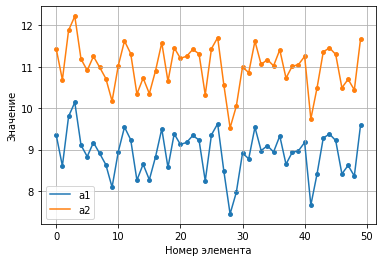

In [188]:
draw_borders(left, right)

In [189]:
left, right = get_borders(means, 0.995)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,10.795158,9.273907,12.739728,10.872479,9.300277,9.522592,14.742501,8.207990,7.370227,11.146111,10.397097,8.768000,12.026195
1,12.387206,6.422374,11.001095,10.846266,10.786462,10.418292,5.173257,7.887718,10.541565,10.983258,9.644749,8.015652,11.273847
2,12.697257,10.911377,7.894112,11.135826,10.923173,11.493440,15.717548,8.437174,8.400406,10.793506,10.840382,9.211284,12.469479
3,14.896836,13.164157,11.010872,9.285888,10.530334,12.094632,8.270831,13.783416,10.106630,8.649681,11.179328,9.550230,12.808425
4,9.078264,11.255656,11.005969,7.295990,10.208475,8.520908,9.972702,11.487714,10.048654,12.585393,10.145973,8.516875,11.775070


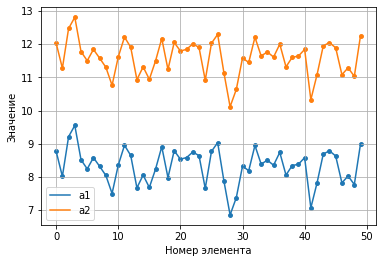

In [190]:
draw_borders(left, right)

In [191]:
left, right = get_borders(means, 0.9995)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,10.795158,9.273907,12.739728,10.872479,9.300277,9.522592,14.742501,8.207990,7.370227,11.146111,10.397097,8.315985,12.478209
1,12.387206,6.422374,11.001095,10.846266,10.786462,10.418292,5.173257,7.887718,10.541565,10.983258,9.644749,7.563637,11.725861
2,12.697257,10.911377,7.894112,11.135826,10.923173,11.493440,15.717548,8.437174,8.400406,10.793506,10.840382,8.759270,12.921494
3,14.896836,13.164157,11.010872,9.285888,10.530334,12.094632,8.270831,13.783416,10.106630,8.649681,11.179328,9.098216,13.260439
4,9.078264,11.255656,11.005969,7.295990,10.208475,8.520908,9.972702,11.487714,10.048654,12.585393,10.145973,8.064861,12.227084


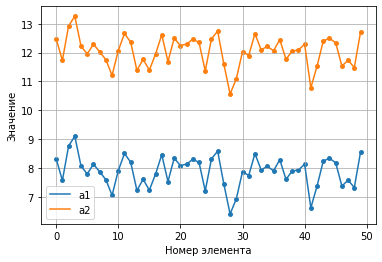

In [192]:
draw_borders(left, right)

## Интервалы для среднего нормальной совокупности

In [193]:
norm_rv = sps.norm(10, 2)
sample = norm_rv.rvs(20)
mean = sample.mean()

ps = [0.8, 0.9, 0.95, 0.98, 0.99, 0.999]
ps = list(map(lambda x: (1+x)/2, ps))
left, right = [], []
for p in ps:
    fp = sps.norm(0,1).ppf(p)
    left.append(mean - fp*(2/np.sqrt(20)))
    right.append(mean + fp*(2/np.sqrt(20)))
    
df = pd.DataFrame(index=ps)
df['left'] = left
df['right'] = right
df

,left,right
0.9000,9.409772,10.556027
0.9500,9.247299,10.718500
0.9750,9.106377,10.859422
0.9900,8.942525,11.023274
0.9950,8.830954,11.134845
0.9995,8.511331,11.454468


## Задача